# Case Study on Probability for Data Science

    Problem Statement:

    To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

    (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)

    Also, if some data pre-processing is necessary do that as well.

    Attribute Information:

    • cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    • cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    • cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    • bruises: bruises=t, no=f
    • odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    • gill-attachment: attached=a, descending=d, free=f, notched=n
    • gill-spacing: close=c, crowded=w, distant=d
    • gill-size: broad=b, narrow=n
    • gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    • stalk-shape: enlarging=e, tapering=t
    • Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    • stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    • stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s • stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    • stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    • veil-type: partial=p, universal=u
    • veil-colour: brown=n, orange=o, white=w, yellow=y
    • ring-number: none=n, one=o, two=t
    • ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    • spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    • population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    • habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Import Dataset

In [2]:
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.shape

(8124, 23)

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


There are 8124 samples in the dataset and all the features are categorical 

### Check null values

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

    There are no null values in the data set

## Predict the Classification feature for the Mashroom dataset

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
y = data["class"]
X = data.drop(["class"], axis=1)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## Preprocessing

### Do label encoding

In [10]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
le = LabelEncoder()
for clm in ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']:
    
    X[clm] = le.fit_transform(X[clm])

In [12]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


    Did label encoding for all the independent features

### LogisticRegression

In [9]:
from sklearn.preprocessing import LabelEncoder 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[989  51]
 [ 51 940]]
              precision    recall  f1-score   support

           e       0.95      0.95      0.95      1040
           p       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Identifty the best values for n_neighbors

In [18]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    #confusion_matrix(y_test, predictions)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.9980305268340719,
 0.9970457902511078,
 0.9960610536681438,
 0.9965534219596258,
 0.9955686853766618,
 0.9950763170851797,
 0.9960610536681438,
 0.9945839487936977,
 0.9935992122107337,
 0.9931068439192516,
 0.9926144756277696,
 0.9940915805022157]

Text(0, 0.5, 'Accuracy')

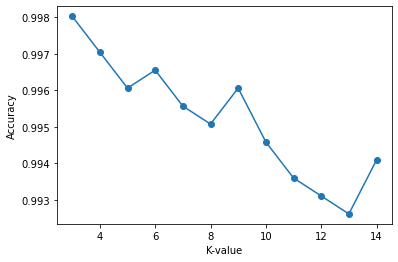

In [19]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

The maximun performance for the KNN model is when the n_neighbors value is 3

In [20]:
#Use GridSearch to find the best hyperparameters values

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [23]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [24]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=1,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1040    0]
 [   0  991]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



    KNN with hyperparameter tuning gives 100% accuracy

### SVM

In [25]:
from sklearn.svm import SVC

In [26]:
clf = SVC(kernel='linear') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[994  46]
 [ 36 955]]
              precision    recall  f1-score   support

           e       0.97      0.96      0.96      1040
           p       0.95      0.96      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [27]:
clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1038    2]
 [  15  976]]
              precision    recall  f1-score   support

           e       0.99      1.00      0.99      1040
           p       1.00      0.98      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dclf = DecisionTreeClassifier()
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1040    0]
 [   0  991]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
nmclf=RandomForestClassifier(n_estimators=50)
model = nmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1040    0]
 [   0  991]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



    Decision tree and Random forest classifier are giving 100% accuracy

### Gaussian Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[958  82]
 [ 67 924]]
              precision    recall  f1-score   support

           e       0.93      0.92      0.93      1040
           p       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



In [43]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gnbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
#Fit the model
best_model = gnbModel_grid.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best var_smoothing:', best_model.best_estimator_.get_params())
print('Best Accuracy Through Grid Search : %.3f'%best_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best var_smoothing: {'priors': None, 'var_smoothing': 8.111308307896872e-05}
Best Accuracy Through Grid Search : 0.928


In [38]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_nb =  BernoulliNB()
#bernoulli_nb.fit(X_train, Y_train)
predictions = bernoulli_nb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[984  56]
 [260 731]]
              precision    recall  f1-score   support

           e       0.79      0.95      0.86      1040
           p       0.93      0.74      0.82       991

    accuracy                           0.84      2031
   macro avg       0.86      0.84      0.84      2031
weighted avg       0.86      0.84      0.84      2031



In [41]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X,y)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.845
Test Accuracy : 0.844
Best Accuracy Through Grid Search : 0.765
Best Parameters :  {'alpha': 0.01}


    The Naive Bayes classifier is giving 93% accuracy and other classification models like Random Forest, Decision tree and KNN are giving better accuracy than Naive Bayes